<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/dialog_axiata_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC,NaN
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC,NaN
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC,NaN
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC,NaN
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC,NaN


In [ ]:
dialog_axiata_plc_price_df = price_df[price_df['Company Name'] == "DIALOG AXIATA PLC"]

In [ ]:
dialog_axiata_plc_price_df['Trade Date'] = pd.to_datetime(dialog_axiata_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-4-1729492358.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dialog_axiata_plc_price_df['Trade Date'] = pd.to_datetime(dialog_axiata_plc_price_df['Trade Date']).dt.date


In [ ]:
dialog_axiata_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
3543,2025-01-31,13.7,14.0,13.7,13.8,220,10801770,150566781.5,DIALOG AXIATA PLC,NaN
3544,2025-01-30,14.0,14.0,13.6,13.7,103,214054,2955342.8,DIALOG AXIATA PLC,NaN
3545,2025-01-29,14.0,14.0,13.8,13.8,276,6232475,87082157.4,DIALOG AXIATA PLC,NaN
3546,2025-01-28,13.3,13.8,13.2,13.8,343,5450694,73959665.3,DIALOG AXIATA PLC,NaN
3547,2025-01-27,13.2,13.5,13.2,13.4,190,1581992,21162022.9,DIALOG AXIATA PLC,NaN
...,...,...,...,...,...,...,...,...,...,...
4722,2020-01-08,12.8,12.8,12.3,12.5,93,1548118,19729827.1,DIALOG AXIATA PLC,NaN
4723,2020-01-07,12.8,12.9,12.6,12.8,94,3584020,45876132.0,DIALOG AXIATA PLC,NaN
4724,2020-01-06,12.9,12.9,12.5,12.9,65,4599721,58885262.5,DIALOG AXIATA PLC,NaN
4725,2020-01-03,12.3,12.9,12.2,12.8,47,1487520,19015291.6,DIALOG AXIATA PLC,NaN


In [ ]:
import matplotlib.pyplot as plt

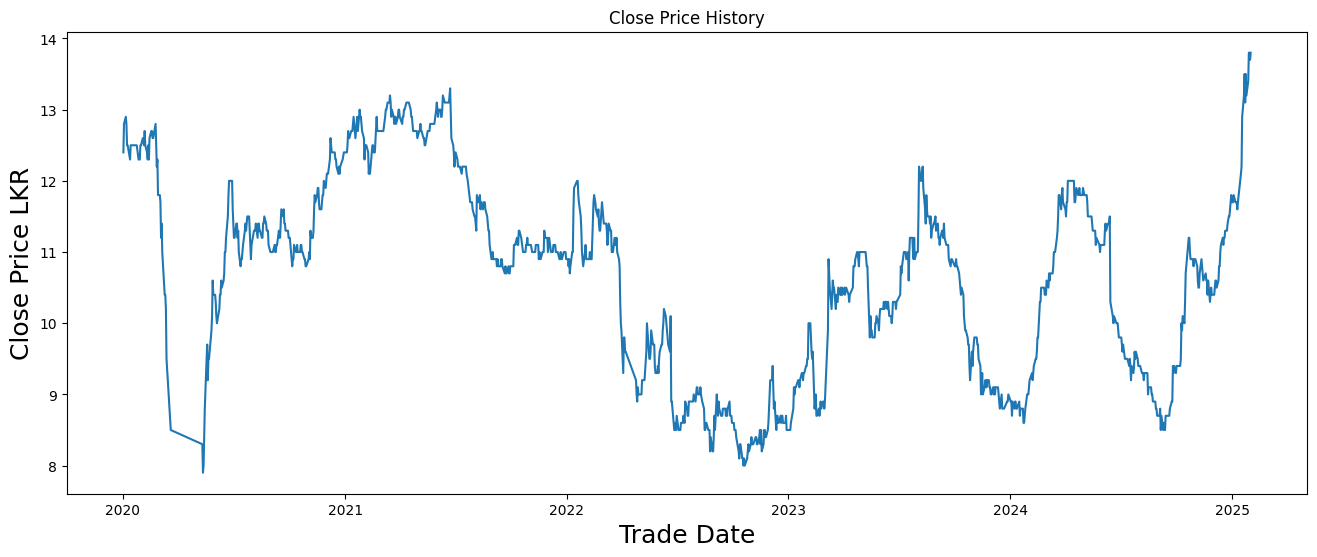

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(dialog_axiata_plc_price_df['Trade Date'],dialog_axiata_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = dialog_axiata_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1125

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[1.        ],
       [0.98305085],
       [1.        ],
       ...,
       [0.84745763],
       [0.83050847],
       [0.76271186]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([1.        , 0.98305085, 1.        , 1.        , 0.93220339,
       0.89830508, 0.94915254, 0.88135593, 0.94915254, 0.89830508,
       0.84745763, 0.72881356, 0.71186441, 0.6440678 , 0.62711864,
       0.6440678 , 0.6440678 , 0.6440678 , 0.66101695, 0.6440678 ,
       0.6440678 , 0.66101695, 0.61016949, 0.61016949, 0.59322034,
       0.57627119, 0.57627119, 0.55932203, 0.55932203, 0.54237288,
       0.55932203, 0.54237288, 0.52542373, 0.49152542, 0.49152542,
       0.45762712, 0.44067797, 0.45762712, 0.45762712, 0.44067797,
       0.42372881, 0.42372881, 0.42372881, 0.44067797, 0.42372881,
       0.40677966, 0.45762712, 0.42372881, 0.45762712, 0.45762712,
       0.47457627, 0.45762712, 0.47457627, 0.49152542, 0.50847458,
       0.47457627, 0.44067797, 0.44067797, 0.45762712, 0.49152542])]
[np.float64(0.5084745762711864)]

[array([1.        , 0.98305085, 1.        , 1.        , 0.93220339,
       0.89830508, 0.94915254, 0.88135593, 0.94915254, 0.89830508,
       0.84745763, 0.728

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# # Build the LSTM model
# model = Sequential()
# model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(25))
# model.add(Dense(1))

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - loss: 0.0155
Epoch 2/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0034
Epoch 3/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0023
Epoch 4/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0022
Epoch 5/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0016
Epoch 6/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0016
Epoch 7/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0021
Epoch 8/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0015
Epoch 9/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0014
Epoch 10/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0013
Epoch 11/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 0.0012
Epoch 12/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0012
Epoch 13/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.0012
Epoch 14/20
1065/1065 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.0012
Epoch 15/20
1065/1065 ━━

In [ ]:
model.save('/content/drive/My Drive/FYP/dialog_axiata_plc_lstm_model.h5')

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


np.float64(0.43363584270566957)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.9158772675535343


/tmp/ipython-input-16-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


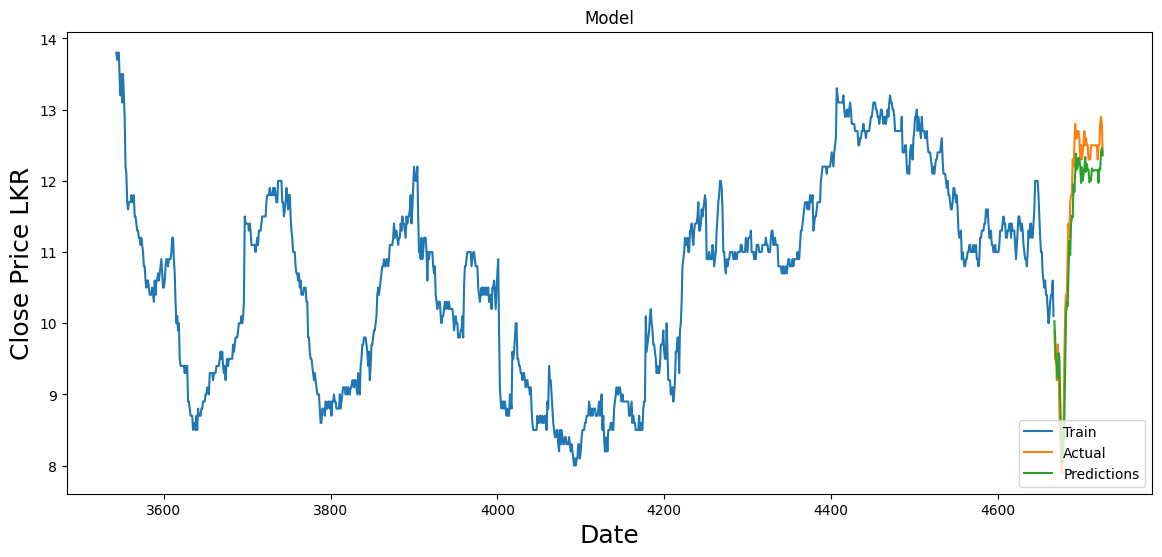

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
future_predictions = []

In [ ]:
_x_test = x_test[:1]

In [ ]:
for i in range(training_data_len, len(dataset)):
    _pred = model.predict(_x_test)
    future_predictions.append(scaler.inverse_transform(_pred))
    _pred = _pred.reshape(1, 1, 1)
    _x_test = np.concatenate((_x_test, _pred), axis=1)
    _x_test = _x_test[:, 1:, :]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━

/tmp/ipython-input-20-571538618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['future_predictions'] = future_predictions[:len(valid)]


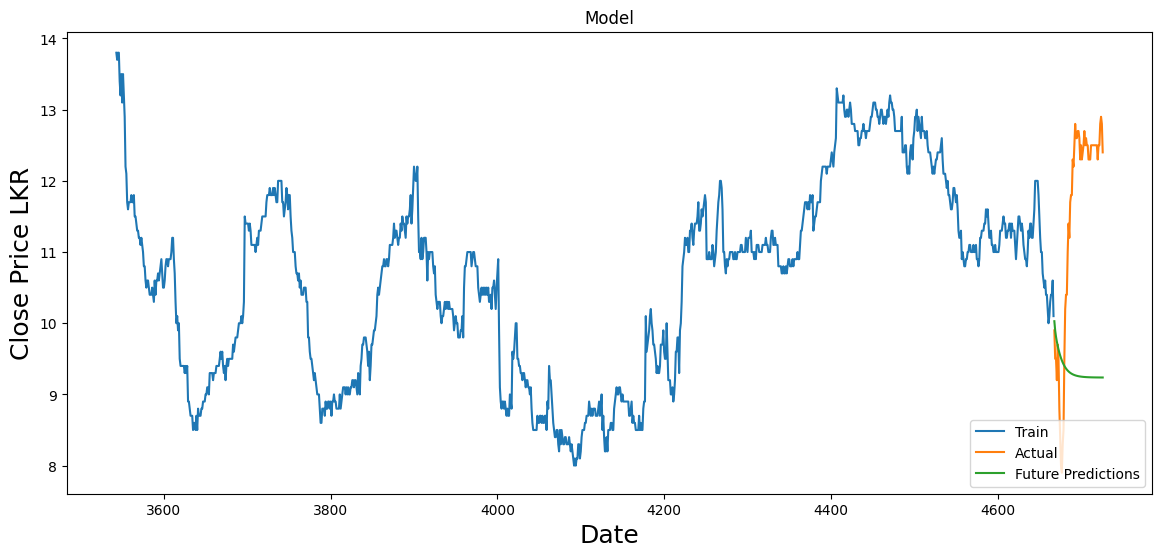

In [ ]:
# Ensure future_predictions matches the length of valid
valid['future_predictions'] = future_predictions[:len(valid)]

# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)

# Plot the training and actual validation data
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'future_predictions']])

# Add legend
plt.legend(['Train', 'Actual', 'Future Predictions'], loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

actual = valid['Close (Rs.)'].values
predicted = valid['future_predictions'].values

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

print(f"24-hour MAE: {mae:.2f}")
print(f"24-hour RMSE: {rmse:.2f}")
print(f"24-hour R² Score: {r2:.4f}")


24-hour MAE: 2.46
24-hour RMSE: 2.72
24-hour R² Score: -2.3083
